In [1]:
#reading in the policy data of countries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)


c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)


c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [2]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]
result = pd.concat(frames)

print( result.shape)
result.head()

(1488, 564)


,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#extracting restrinction policy scores of 8 policies for 5 different countries 
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('Hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']


number of policies & number of days is 8 , 562


In [5]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

deutch_policy.loc["Daily_Sum"] = deutch_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()

/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
def week_policy_country_2020 (country_policy):

    country_policy_transposed =country_policy.T 
    country_policy_transposed.reset_index(inplace=True)

    country_policy_transposed = country_policy_transposed.drop(labels=0, axis=0)
    country_policy_transposed.rename(columns=country_policy_transposed.iloc[0])
#drop the first row
    country_policy_transposed=country_policy_transposed.iloc[1:,:]
# rename the "index column" to "Date" and change it from string to datetime

    country_policy_transposed.columns
    country_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']
    country_policy_transposed['Date']=pd.to_datetime(country_policy_transposed['Date'])

#extract the week number (of the year) and add it as a new column

    country_policy_transposed['week_of_year']= country_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])

#extract the week number (of the year) and add it as a new column

    country_policy_transposed['week_of_year']= country_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

    country_policy_transposed_FirstLastWeekDropped=country_policy_transposed.loc[( (country_policy_transposed['Date'] < '2021-01-01 00:00:00') & (country_policy_transposed['week_of_year']< 52) & (1<country_policy_transposed['week_of_year']))]

#head
    country_policy_transposed_FirstLastWeekDropped.head()

#extract only the two columns of daily_sum and week_of year
    policy_2020_total_country=country_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
    policy_2020_total_country.head(10)
    weekly_policy_2020_country=policy_2020_total_country.groupby(['week_of_year']).sum()
#average weekly independent variable
    weekly_policy_2020_country=weekly_policy_2020_country/7
    
    return weekly_policy_2020_country



In [7]:
weekly_policy_2020_deutch=week_policy_country_2020(deutch_policy)
weekly_policy_2020_hungary=week_policy_country_2020(hungary_policy)
weekly_policy_2020_sweden=week_policy_country_2020(sweden_policy)
weekly_policy_2020_italy=week_policy_country_2020(italy_policy)
weekly_policy_2020_poland=week_policy_country_2020(poland_policy)



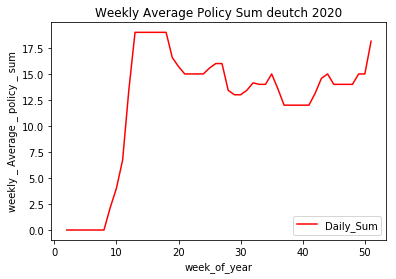

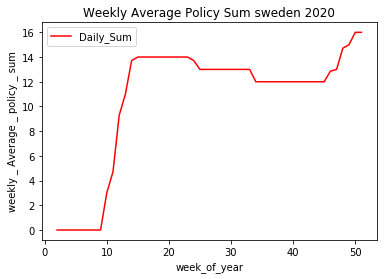

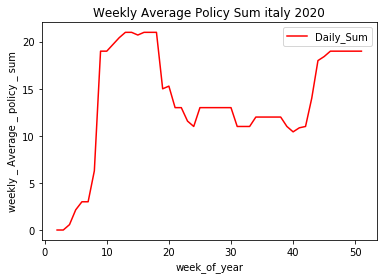

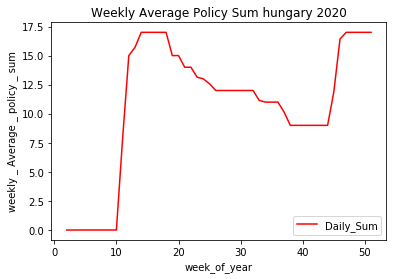

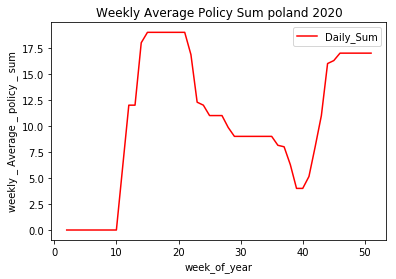

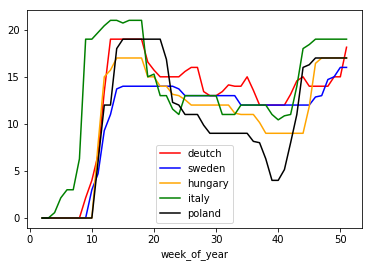

In [8]:

ax = plt.gca()
weekly_policy_2020_deutch.plot(kind='line',y='Daily_Sum', color='red', ax=ax)
plt.title('Weekly Average Policy Sum deutch 2020')
plt.ylabel('weekly _ Average _ policy _ sum')
plt.xlabel('week_of_year')
plt.show()


ax = plt.gca()
weekly_policy_2020_sweden.plot(kind='line',y='Daily_Sum', color='red', ax=ax)
plt.title('Weekly Average Policy Sum sweden 2020')
plt.ylabel('weekly _ Average _ policy _ sum')
plt.xlabel('week_of_year')
plt.show()


ax = plt.gca()
weekly_policy_2020_italy.plot(kind='line',y='Daily_Sum', color='red', ax=ax)
plt.title('Weekly Average Policy Sum italy 2020')
plt.ylabel('weekly _ Average _ policy _ sum')
plt.xlabel('week_of_year')
plt.show()


ax = plt.gca()
weekly_policy_2020_hungary.plot(kind='line',y='Daily_Sum', color='red', ax=ax)
plt.title('Weekly Average Policy Sum hungary 2020')
plt.ylabel('weekly _ Average _ policy _ sum')
plt.xlabel('week_of_year')
plt.show()



ax = plt.gca()
weekly_policy_2020_poland.plot(kind='line',y='Daily_Sum', color='red', ax=ax)
plt.title('Weekly Average Policy Sum poland 2020')
plt.ylabel('weekly _ Average _ policy _ sum')
plt.xlabel('week_of_year')
plt.show()

ax = plt.gca()

weekly_policy_2020_deutch.plot(kind='line',y='Daily_Sum', color='red', ax=ax, label='deutch')
weekly_policy_2020_sweden.plot(kind='line',y='Daily_Sum', color='blue', ax=ax, label='sweden')
weekly_policy_2020_hungary.plot(kind='line',y='Daily_Sum', color='orange', ax=ax, label='hungary')
weekly_policy_2020_italy.plot(kind='line',y='Daily_Sum', color='green', ax=ax, label='italy')
weekly_policy_2020_poland.plot(kind='line',y='Daily_Sum', color='black', ax=ax, label='poland')
plt.legend()
plt.show()




weekly_policy_2020_deutch=weekly_policy_2020_deutch['Daily_Sum'].tolist()
weekly_policy_2020_hungary=weekly_policy_2020_hungary['Daily_Sum'].tolist()
weekly_policy_2020_sweden=weekly_policy_2020_sweden['Daily_Sum'].tolist()
weekly_policy_2020_italy=weekly_policy_2020_italy['Daily_Sum'].tolist()
weekly_policy_2020_poland=weekly_policy_2020_poland['Daily_Sum'].tolist()

In [9]:

#Reading in the editorship data of the 5 countrie

from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")

revs_deutch = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [10]:
def editorial_data(revs_country):
    #making up the datetime structure 
    revs_country['dateInt']=revs_country['y'].astype(str) + revs_country['m'].astype(str).str.zfill(2)+ revs_country['d'].astype(str).str.zfill(2)
    revs_country['Date'] = pd.to_datetime(revs_country['dateInt'], format='%Y%m%d')      
    revs_country = revs_country.reset_index()
    #extract the week number and add it as a new column
    revs_country['week_of_year']= revs_country['Date'].apply(lambda x: x.isocalendar()[1])
    #extract the hour of the week
    #revs_country['hour_of_week']=revs_country['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
    revs_country['hour_of_week']=revs_country['Date'].apply(lambda x: 24*x.weekday()) + revs_country['h']


    revs_country_2019=revs_country.loc[(revs_country['Date'] >= '2019-01-01 00:00:00') & (revs_country['Date'] < '2020-01-01 00:00:00') & (revs_country['week_of_year'] < 52)& (1<revs_country['week_of_year'])]
    revs_country_2020=revs_country.loc[(revs_country['Date'] >= '2020-01-01 00:00:00') & (revs_country['Date'] < '2021-01-01 00:00:00')& (revs_country['week_of_year'] < 52)& (1<revs_country['week_of_year'])]
    #2020
    grouped_country_2020=revs_country_2020.groupby(['week_of_year', 'hour_of_week']).sum()
    grouped_country_2020 = grouped_country_2020.reset_index()
    grouped_country_2020.head(20)

    array_weekly_events_country_2020 = np.zeros((52,168))
    for  i in range (grouped_country_2020.shape[0]):
        week=grouped_country_2020.iloc[i]['week_of_year']
        hour=grouped_country_2020.iloc[i]['hour_of_week']
        array_weekly_events_country_2020[week][hour]= grouped_country_2020.iloc[i]['c']
        
    weekly_sum_country_2020=np.sum(array_weekly_events_country_2020 , axis=1)
    
    array_weekly_ratios_country_2020=np.zeros((50,168))
    for i in range (50):
        array_weekly_ratios_country_2020[i]=array_weekly_events_country_2020[i+2]/weekly_sum_country_2020[i+2]


    #same for 2019
    grouped_country_2019=revs_country_2019.groupby(['week_of_year', 'hour_of_week']).sum()
    grouped_country_2019 = grouped_country_2019.reset_index()
    array_weekly_events_country_2019 = np.zeros((52,168))
    
    for  i in range (grouped_country_2019.shape[0]):
    
        week=grouped_country_2019.iloc[i]['week_of_year']
        hour=grouped_country_2019.iloc[i]['hour_of_week']
        array_weekly_events_country_2019[week][hour]= grouped_country_2019.iloc[i]['c']
    
    weekly_sum_country_2019=np.sum(array_weekly_events_country_2019 , axis=1)
    
    
    array_weekly_ratios_country_2019=np.zeros((50,168))
    for i in range (50):
    
        array_weekly_ratios_country_2019[i]=array_weekly_events_country_2019[i+2]/weekly_sum_country_2019[i+2]


    return   weekly_sum_country_2020, weekly_sum_country_2019, array_weekly_ratios_country_2020, array_weekly_ratios_country_2019


In [11]:
weekly_sum_poland_2020, weekly_sum_poland_2019, array_weekly_ratios_poland_2020, array_weekly_ratios_poland_2019 = editorial_data(revs_poland)
weekly_sum_sweden_2020, weekly_sum_sweden_2019, array_weekly_ratios_sweden_2020, array_weekly_ratios_sweden_2019 = editorial_data(revs_sweden)
weekly_sum_italy_2020, weekly_sum_italy_2019, array_weekly_ratios_italy_2020, array_weekly_ratios_italy_2019 = editorial_data(revs_italy)
weekly_sum_hungary_2020, weekly_sum_hungary_2019, array_weekly_ratios_hungary_2020, array_weekly_ratios_hungary_2019 = editorial_data(revs_hungary)
weekly_sum_deutch_2020, weekly_sum_deutch_2019, array_weekly_ratios_deutch_2020, array_weekly_ratios_deutch_2019 = editorial_data(revs_deutch)


In [12]:
from scipy.stats import wasserstein_distance
from scipy.spatial import distance

def earthmover(year1ratiolist, year2ratiolist):

    earthmover_differences= []
    for i in range(len(year1ratiolist)) :
        earthmover_differences.append(wasserstein_distance(year1ratiolist[i], year2ratiolist[i]))
    return earthmover_differences


def jensenshanon(year1ratiolist, year2ratiolist):

    jensenshanon_differences= []

    for i in range(len(year1ratiolist)) :
        jensenshanon_differences.append(distance.jensenshannon(year1ratiolist[i], year2ratiolist[i]))
    return jensenshanon_differences

In [13]:
earthmover_differences_deutch=earthmover(array_weekly_ratios_deutch_2019, array_weekly_ratios_deutch_2020)
jensenshanon_differences_deutch=jensenshanon(array_weekly_ratios_deutch_2019, array_weekly_ratios_deutch_2020)

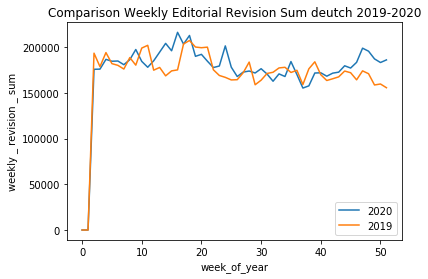

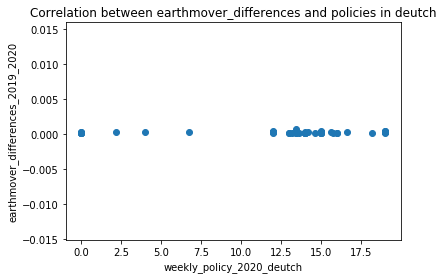

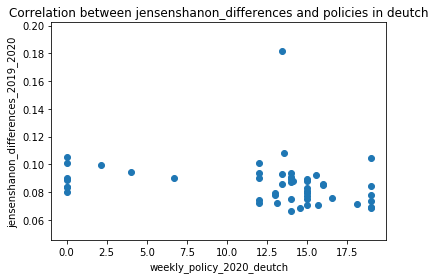

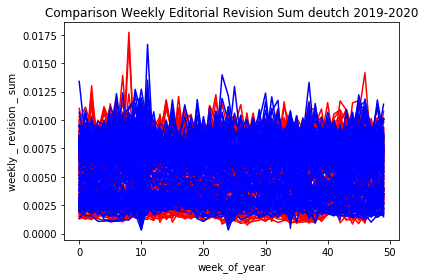

In [14]:
import matplotlib.pyplot as plt



ax = plt.gca()
plt.plot(weekly_sum_deutch_2020, label='2020') 
plt.plot(weekly_sum_deutch_2019, label='2019') 
plt.legend();
plt.title('Comparison Weekly Editorial Revision Sum deutch 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()


plt.scatter(weekly_policy_2020_deutch, earthmover_differences_deutch) 
plt.title('Correlation between earthmover_differences and policies in deutch')
plt.xlabel('weekly_policy_2020_deutch')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



plt.scatter(weekly_policy_2020_deutch, jensenshanon_differences_deutch) 
plt.title('Correlation between jensenshanon_differences and policies in deutch')
plt.xlabel('weekly_policy_2020_deutch')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

ax = plt.gca()
# '-g', label='2019'
plt.plot(array_weekly_ratios_deutch_2020, color='red') 
plt.plot(array_weekly_ratios_deutch_2019,color='blue') 
plt.legend()
plt.title('Comparison Weekly Editorial Revision Sum deutch 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()






In [15]:

earthmover_differences_sweden=earthmover(array_weekly_ratios_sweden_2019, array_weekly_ratios_sweden_2020)
jensenshanon_differences_sweden=jensenshanon(array_weekly_ratios_sweden_2019, array_weekly_ratios_sweden_2020)

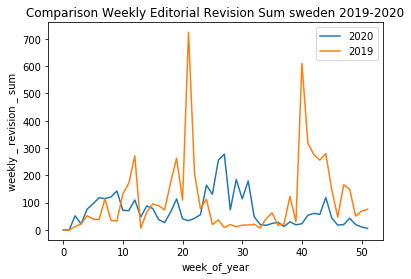

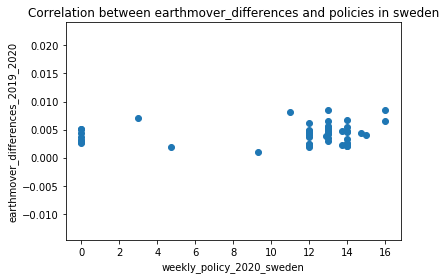

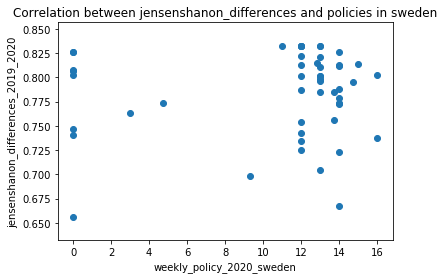

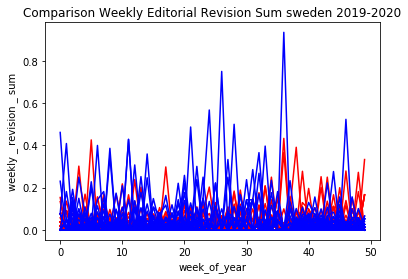

In [16]:
import matplotlib.pyplot as plt

ax = plt.gca()
plt.plot(weekly_sum_sweden_2020, label='2020') 
plt.plot(weekly_sum_sweden_2019, label='2019') 
plt.legend();
plt.title('Comparison Weekly Editorial Revision Sum sweden 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()


plt.scatter(weekly_policy_2020_sweden, earthmover_differences_sweden) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



plt.scatter(weekly_policy_2020_sweden, jensenshanon_differences_sweden) 
plt.title('Correlation between jensenshanon_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


ax = plt.gca()
# '-g', label='2019'
plt.plot(array_weekly_ratios_sweden_2020, color='red') 
plt.plot(array_weekly_ratios_sweden_2019,color='blue') 
plt.legend()

plt.title('Comparison Weekly Editorial Revision Sum sweden 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [17]:
earthmover_differences_italy=earthmover(array_weekly_ratios_italy_2019, array_weekly_ratios_italy_2020)
jensenshanon_differences_italy=jensenshanon(array_weekly_ratios_italy_2019, array_weekly_ratios_italy_2020)


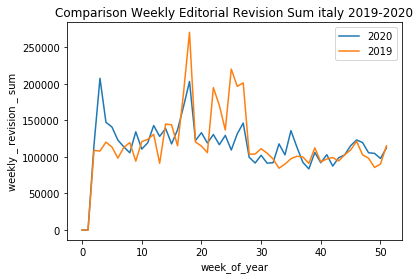

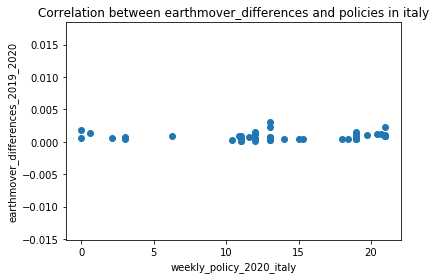

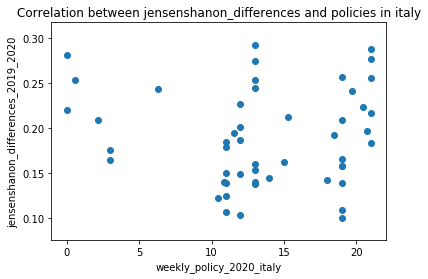

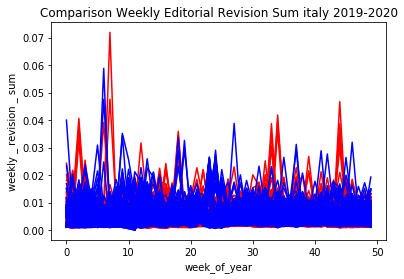

In [18]:
import matplotlib.pyplot as plt

ax = plt.gca()
plt.plot(weekly_sum_italy_2020, label='2020') 
plt.plot(weekly_sum_italy_2019, label='2019') 
plt.legend();
plt.title('Comparison Weekly Editorial Revision Sum italy 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()


plt.scatter(weekly_policy_2020_italy, earthmover_differences_italy) 
plt.title('Correlation between earthmover_differences and policies in italy')
plt.xlabel('weekly_policy_2020_italy')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



plt.scatter(weekly_policy_2020_italy, jensenshanon_differences_italy) 
plt.title('Correlation between jensenshanon_differences and policies in italy')
plt.xlabel('weekly_policy_2020_italy')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


ax = plt.gca()
# '-g', label='2019'
plt.plot(array_weekly_ratios_italy_2020, color='red') 
plt.plot(array_weekly_ratios_italy_2019,color='blue') 
plt.legend()

plt.title('Comparison Weekly Editorial Revision Sum italy 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [19]:


earthmover_differences_hungary=earthmover(array_weekly_ratios_hungary_2019, array_weekly_ratios_hungary_2020)
jensenshanon_differences_hungary=jensenshanon(array_weekly_ratios_hungary_2019, array_weekly_ratios_hungary_2020)


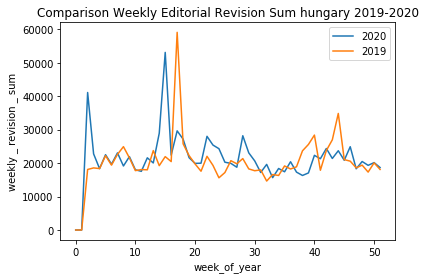

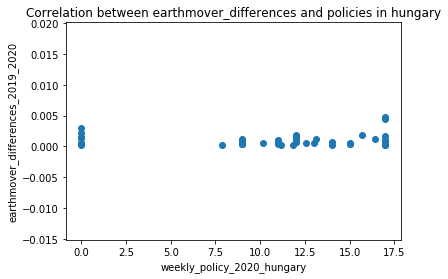

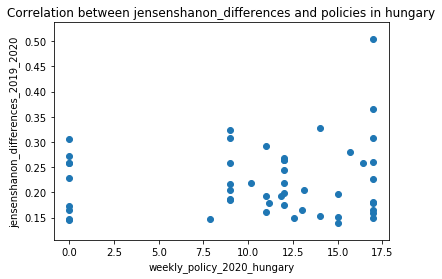

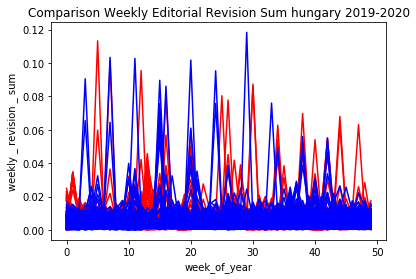

In [20]:
import matplotlib.pyplot as plt

ax = plt.gca()
plt.plot(weekly_sum_hungary_2020, label='2020') 
plt.plot(weekly_sum_hungary_2019, label='2019') 
plt.legend();
plt.title('Comparison Weekly Editorial Revision Sum hungary 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()


plt.scatter(weekly_policy_2020_hungary, earthmover_differences_hungary) 
plt.title('Correlation between earthmover_differences and policies in hungary')
plt.xlabel('weekly_policy_2020_hungary')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



plt.scatter(weekly_policy_2020_hungary, jensenshanon_differences_hungary) 
plt.title('Correlation between jensenshanon_differences and policies in hungary')
plt.xlabel('weekly_policy_2020_hungary')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

ax = plt.gca()
# '-g', label='2019'
plt.plot(array_weekly_ratios_hungary_2020, color='red') 
plt.plot(array_weekly_ratios_hungary_2019,color='blue') 
plt.legend()

plt.title('Comparison Weekly Editorial Revision Sum hungary 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()


In [21]:

earthmover_differences_poland=earthmover(array_weekly_ratios_poland_2019, array_weekly_ratios_poland_2020)
jensenshanon_differences_poland=jensenshanon(array_weekly_ratios_poland_2019, array_weekly_ratios_poland_2020)


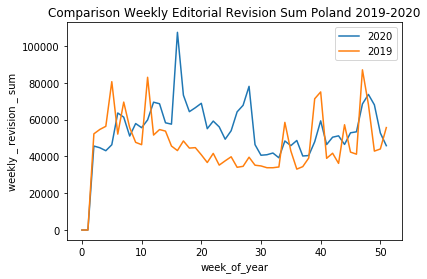

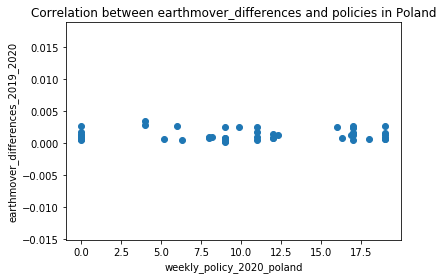

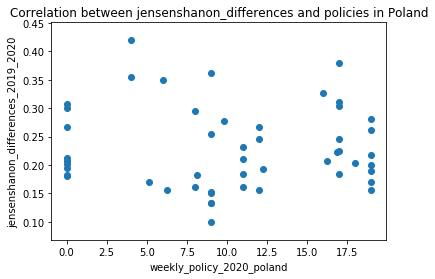

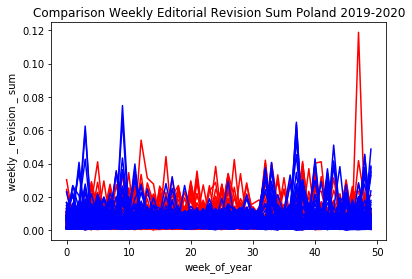

In [22]:
import matplotlib.pyplot as plt

ax = plt.gca()
plt.plot(weekly_sum_poland_2020, label='2020') 
plt.plot(weekly_sum_poland_2019, label='2019') 
plt.legend();
plt.title('Comparison Weekly Editorial Revision Sum Poland 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()


plt.scatter(weekly_policy_2020_poland, earthmover_differences_poland) 
plt.title('Correlation between earthmover_differences and policies in Poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



plt.scatter(weekly_policy_2020_poland, jensenshanon_differences_poland) 
plt.title('Correlation between jensenshanon_differences and policies in Poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

ax = plt.gca()
# '-g', label='2019'
plt.plot(array_weekly_ratios_poland_2020, color='red') 
plt.plot(array_weekly_ratios_poland_2019,color='blue') 
plt.legend()

plt.title('Comparison Weekly Editorial Revision Sum Poland 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()




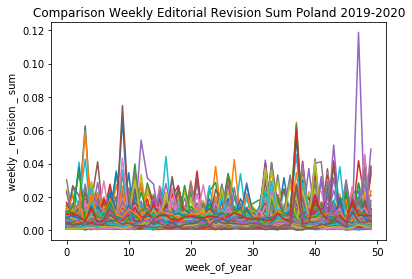

In [23]:
import matplotlib.pyplot as plt
ax = plt.gca()
# '-g', label='2019'
plt.plot(array_weekly_ratios_poland_2020) 
plt.plot(array_weekly_ratios_poland_2019) 

plt.title('Comparison Weekly Editorial Revision Sum Poland 2019-2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()